In [1]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("boston.csv",header=0)
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [3]:
df = df.values
print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [4]:
df = np.array(df)

for i in range(12):
    df[:,i] = df[:,i] /(df[:,i].max()-df[:,i].min())
    
x_data = df[:,:12]
y_data = df[:,12]
print(x_data,'\n',x_data.shape)
print(y_data,'\n',y_data.shape)

[[7.10352762e-05 1.80000000e-01 8.46774194e-02 ... 5.64885496e-01
  1.62765957e+00 1.37417219e-01]
 [3.06957815e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 2.52207506e-01]
 [3.06733020e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 1.11203091e-01]
 ...
 [6.82927750e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.55629139e-01]
 [1.23176518e-03 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.78807947e-01]
 [5.32876969e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 2.17439294e-01]] 
 (506, 12)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20

In [5]:
#多元线形回归模型

#定义占位符
x = tf.placeholder(tf.float32,[None,12],name = 'X')
y = tf.placeholder(tf.float32,[None,1],name = 'Y')

In [6]:
#定义了一个命名空间
with tf.name_scope('Model'):
    w = tf.Variable(tf.random_normal([12,1],stddev=0.01),name='W')
    
    b = tf.Variable(1.0,name='b')
    
    def model(x,w,b):
        return tf.matmul(x,w)+b
    
    pred = model(x,w,b)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#训练模型
train_epochs = 50
learning_rate = 0.01

with tf.name_scope('LossFunction'):
    loss_function = tf.reduce_mean(tf.pow(y-pred,2))
    
#创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [8]:
#启动会话
sees = tf.Session()
init = tf.global_variables_initializer()

In [9]:
logdir = 'log'
sum_loss_op = tf.summary.scalar("loss",loss_function)
merged = tf.summary.merge_all()


In [10]:
sees.run(init)
writer = tf.summary.FileWriter(logdir,sees.graph)
loss_list = []

<IPython.core.display.Javascript object>


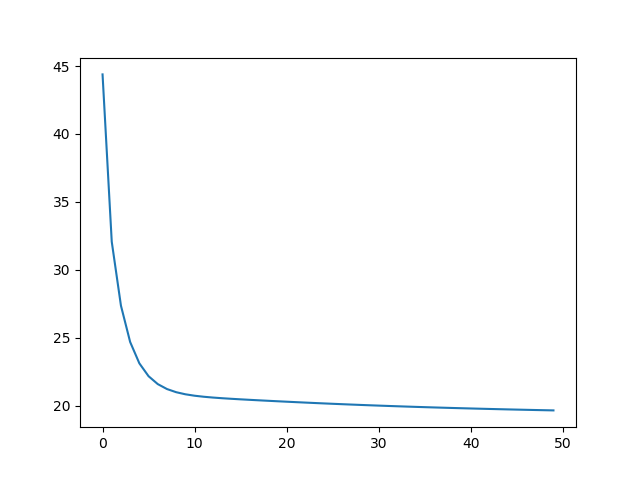

In [11]:
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs,ys in zip(x_data,y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        _,summary_str,loss = sees.run([optimizer,sum_loss_op,loss_function],feed_dict = {x:xs,y:ys})  
        
        writer.add_summary(summary_str,epoch)
        
        loss_sum =loss_sum + loss
    
    #打乱数据
    xvalues ,yvalues = shuffle(x_data,y_data)
    
    b0temp = b.eval(session = sees) 
    w0temp = w.eval(session = sees) 
    loss_average = loss_sum / len(y_data)
    
    loss_list.append(loss_average)
    
    #print("epoch = ", epoch+1,'\n loss = ', loss_average," b = ",b0temp," w = ",w0temp)
    
plt.plot(loss_list)

In [12]:
#预测
n = np.random.randint(506)
print(n)
x_test = x_data[n]

x_test = x_test.reshape(1,12)
predict = sees.run(pred,feed_dict = {x:x_test})
print("predict = ",predict)

print("target = ",y_data[n])

233
predict =  [[33.641644]]
target =  48.3


In [13]:
sees.close()

In [ ]:
# cd python
# tensorboard --logdir=log